In [ ]:
import cv2
import pandas as pd
import os
import csv 
import numpy as np
from skimage.feature import hog
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Here HOG is performed to extract features from images and data of features associated with its label is stored in form csv.

In [ ]:
def extract_features(image):
  fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
  return fd# Set parameters for HOG computation
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# Set directory paths
image_dir = '/content/drive/MyDrive/rice_leaf_diseases'
output_file = '/content/features.csv'

# Get list of subdirectories (assuming each subdirectory represents a class)
subdirs = sorted([os.path.join(image_dir, d) for d in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, d))])

# Initialize data and label arrays
data = []
labels = []

# Loop over subdirectories
for subdir in subdirs:
    print('Processing', subdir)
    # Get list of image files in the subdirectory
    files = sorted([os.path.join(subdir, f) for f in os.listdir(subdir) if os.path.isfile(os.path.join(subdir, f))])
    # Loop over images in the subdirectory
    for file in files:
        # Read image and resize it to a fixed size
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (64, 64))
        # Compute HOG features and append to data array
        fd = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block)
        data.append(fd)
        # Extract label from directory name and append to label array
        label = subdir.split('/')[-1]
        labels.append(label)
#Here PCA needed to be perfromed as dataset very large number  of features 
features = np.array(data)
mean = np.mean(features, axis=0)
std = np.std(features, axis=0)
features = (features - mean) / std

# Perform PCA
pca = PCA(n_components=10)
pca.fit(features)
reduced_features = pca.transform(features)
labels = np.array(labels)
# Write data and labels arrays to CSV file
with open(output_file, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['label'] + ['feature_{}'.format(i) for i in range(len(reduced_features[0]))])
    for i in range(len(data)):
        writer.writerow([labels[i]] + list(reduced_features[i]))


Processing /content/drive/MyDrive/rice_leaf_diseases/.ipynb_checkpoints
Processing /content/drive/MyDrive/rice_leaf_diseases/1
Processing /content/drive/MyDrive/rice_leaf_diseases/2
Processing /content/drive/MyDrive/rice_leaf_diseases/3


In [35]:
# Load the CSV file into a DataFrame
data = pd.read_csv('features.csv')
# Split the DataFrame into feature and target arrays
X = data.iloc[1:, 1:].values
y = data.iloc[1:, 0].values
print("Features-",X)
print("Labels-",y)
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train-",len(X_train))
print("X_test-",len(X_test))

Features- [[ -4.36922401 -13.46398927   1.82156619 ...  -2.94394779 -12.96438109
   -2.44750385]
 [ -9.92588525  -0.83172088 -14.52199414 ...  -4.03135505   7.34975751
    2.18820519]
 [-14.88016069   3.00756782   9.45947358 ...   1.7254618  -11.94967668
    3.61767839]
 ...
 [  8.27873639  12.64867913  16.80260218 ...  -6.25542219   1.43710426
    4.17321327]
 [ 16.32357441  11.49085528  16.24313176 ...   2.05958342   2.20931265
    1.67979232]
 [  7.57393699  -2.00716033   1.67308543 ...  -4.52352316   2.71591861
    7.32063437]]
Labels- [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3]
X_train- 89
X_test- 30


Applying Logistic Regression to dataset and claculating accuracy.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# standardize feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train logistic regression model
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the training and testing accuracy
print("Training Accuracy: {:.2f}%".format(train_accuracy*100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy*100))
# predict on test set and evaluate model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training Accuracy: 70.53%
Testing Accuracy: 66.67%
Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.71      0.67         7
           2       0.67      0.75      0.71         8
           3       0.71      0.56      0.63         9

    accuracy                           0.67        24
   macro avg       0.67      0.67      0.67        24
weighted avg       0.67      0.67      0.66        24

Confusion Matrix:
 [[5 1 1]
 [1 6 1]
 [2 2 5]]


Applying Random Forest Classifier to dataset and claculating accuracy.

In [49]:
# Split the dataset into training and testing sets
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Preprocess the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the training and testing accuracy
print("Training Accuracy: {:.2f}%".format(train_accuracy*100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy*100))

# Evaluate the accuracy of the trained model
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training Accuracy: 67.59%
Testing Accuracy: 91.67%
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.67      0.67      0.67         3
           3       0.60      0.75      0.67         4

    accuracy                           0.75        12
   macro avg       0.76      0.74      0.74        12
weighted avg       0.78      0.75      0.76        12

Confusion Matrix:
 [[4 0 1]
 [0 2 1]
 [0 1 3]]


Applying Gaussian Naive Bayes to dataset and claculating accuracy.

In [61]:
# Split the dataset into training and testing sets
X = data.iloc[1:, 1:].values
y = data.iloc[1:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Preprocess the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train a Naive Bayes Classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the training and testing accuracy
print("Training Accuracy: {:.2f}%".format(train_accuracy*100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy*100))

# Evaluate the accuracy of the trained model
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Training Accuracy: 71.91%
Testing Accuracy: 63.33%
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.82      0.69        11
           2       0.67      0.55      0.60        11
           3       0.50      0.38      0.43         8

    accuracy                           0.60        30
   macro avg       0.59      0.58      0.57        30
weighted avg       0.60      0.60      0.59        30

Confusion Matrix:
 [[9 2 0]
 [2 6 3]
 [4 1 3]]


Applying DecisionTreeClassifier to dataset and claculating accuracy.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Preprocess the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the training and testing accuracy
print("Training Accuracy: {:.2f}%".format(train_accuracy*100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy*100))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Training Accuracy: 100.00%
Testing Accuracy: 56.67%
Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.82      0.69        11
           2       0.67      0.55      0.60        11
           3       0.50      0.38      0.43         8

    accuracy                           0.60        30
   macro avg       0.59      0.58      0.57        30
weighted avg       0.60      0.60      0.59        30

Confusion Matrix:
 [[9 2 0]
 [2 6 3]
 [4 1 3]]


Applying SVM to dataset and claculating accuracy.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Preprocess the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf = SVC()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the training and testing accuracy
print("Training Accuracy: {:.2f}%".format(train_accuracy*100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy*100))



Training Accuracy: 85.05%
Testing Accuracy: 58.33%


Applying CNN to dataset and claculating accuracy.

In [31]:
import pathlib
image_dir = '/content/drive/MyDrive/rice_leaf_diseases'
data_dir=pathlib.Path(image_dir)
dict={"bacteria":list(data_dir.glob("1/*")),"brown":list(data_dir.glob("2/*")),"smut":list(data_dir.glob("3/*"))}
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,}
X, y = [], []
for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])
X = np.array(X)
y = np.array(y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
len(X_test)
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
num_classes = 3
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)


Epoch 1/30
3/3 [==============================] - 5s 2s/step - loss: 2.5772 - accuracy: 0.3111
Epoch 2/30
3/3 [==============================] - 3s 847ms/step - loss: 1.4231 - accuracy: 0.2889
Epoch 3/30
3/3 [==============================] - 4s 2s/step - loss: 1.0755 - accuracy: 0.4333
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 1.0942 - accuracy: 0.3556
Epoch 5/30
3/3 [==============================] - 6s 2s/step - loss: 1.0125 - accuracy: 0.5444
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 0.9678 - accuracy: 0.5222
Epoch 7/30
3/3 [==============================] - 3s 1s/step - loss: 0.8732 - accuracy: 0.6000
Epoch 8/30
3/3 [==============================] - 5s 2s/step - loss: 0.8218 - accuracy: 0.6333
Epoch 9/30
3/3 [==============================] - 4s 1s/step - loss: 0.7607 - accuracy: 0.6556
Epoch 10/30
3/3 [==============================] - 4s 1s/step - loss: 0.6071 - accuracy: 0.8000
Epoch 11/30
3/3 [=============================

Here is an example to predict disease where input image is taken from internet.

1/1 [==============================] - 0s 50ms/step
[[4.2868495 4.0035114 4.998133 ]]
Labels with their values---[0] Bacterial Flight----[1] Brown Spot----[2] Leaf Smut
Predicted label: 2


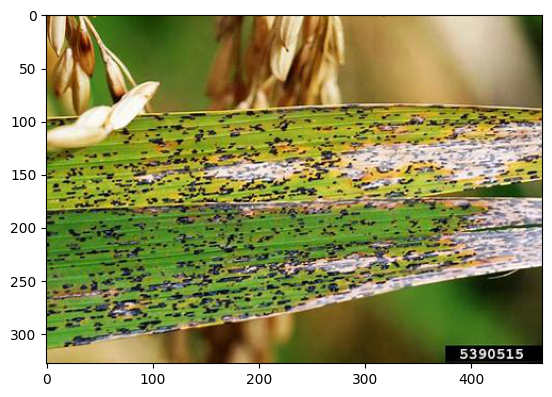

In [30]:
import matplotlib.pyplot as plt
from skimage import io
z = cv2.imread('/content/download.jpeg')
z = cv2.resize(z,(180,180))
z = z / 255.0
z = np.expand_dims(z, axis=0)
za = io.imread('/content/download.jpeg')
plt.imshow(za,cmap=plt.cm.gray)
pred = model.predict(z)
print(pred)
label = np.argmax(pred)
print('Labels with their values---[0] Bacterial Flight----[1] Brown Spot----[2] Leaf Smut')
print('Predicted label:', label)